In [6]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
import os
import numpy as np
import cv2

In [7]:
dir = 'C:\\Users\\HP\\anaconda3\\Research_Papaya\\Untouch_DataSet_1\\Input_DataSet'

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']
data = []

for category in categories:
    path = os.path.join(dir,category)
    label= categories.index(category) 
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        papaya_img=cv2.imread(imgpath,0)
        try:
            papaya_img=cv2.resize(papaya_img,(50,50))
            image = np.array(papaya_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
        
print(len(data))

54462


In [8]:
import pickle
import random
from sklearn.model_selection import train_test_split


pick_in=open('knn.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [9]:
pick_in=open('knn.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [11]:
from sklearn.neighbors import KNeighborsClassifier

features = []
labels = []
random.shuffle(data)

for feature, label in data:
    features.append(feature)
    labels.append(label)

    
xtrain, xtest, ytrain, ytest = train_test_split(features,labels, test_size = 0.98)
model = KNeighborsClassifier(n_neighbors=10)
model.fit(xtrain, ytrain)

pick = open('knn1.sav','wb')
pickle.dump(model,pick)
pick.close()

Accuracy:   0.32244767953834336
Prediction is  :  ring_spot_1


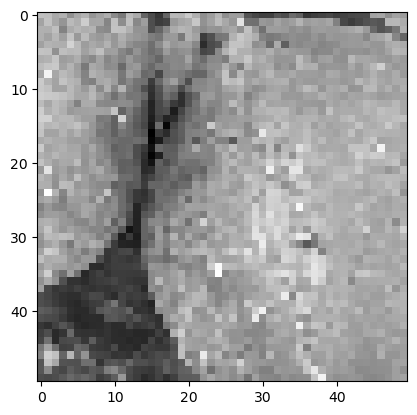

In [12]:
pick = open('knn1.sav','rb')
model = pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['anthracnose_1','black_spot_1','phytophthora_1','powdery_mildew_1','ring_spot_1']

print('Accuracy:  ', accuracy)
print('Prediction is  : ',categories[prediction[0]])


mypapaya=xtest[0].reshape(50,50)
plt.imshow(mypapaya,cmap='gray')
plt.show()

In [17]:

from sklearn.metrics import confusion_matrix
y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
cm


array([[ 1005,    19,    52,  3041,  2411],
       [ 1534,   463,   231,  8273,  1606],
       [  410,   135,  1175,  8204,  1322],
       [  246,    17,    57, 12698,  3779],
       [  217,    17,   116,  4476,  1869]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

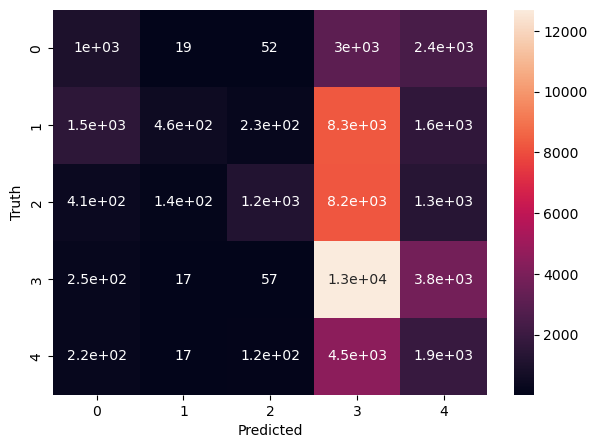

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.metrics import classification_report

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.15      0.20      6528
           1       0.71      0.04      0.07     12107
           2       0.72      0.10      0.18     11246
           3       0.35      0.76      0.47     16797
           4       0.17      0.28      0.21      6695

    accuracy                           0.32     53373
   macro avg       0.45      0.27      0.23     53373
weighted avg       0.48      0.32      0.26     53373

